# Question 1
## Classify the Size_Categorie using SVM

- month	month of the year: 'jan' to 'dec'
- day	day of the week: 'mon' to 'sun'
- FFMC	FFMC index from the FWI system: 18.7 to 96.20
- DMC	DMC index from the FWI system: 1.1 to 291.3
- DC	DC index from the FWI system: 7.9 to 860.6
- ISI	ISI index from the FWI system: 0.0 to 56.10
- temp	temperature in Celsius degrees: 2.2 to 33.30
- RH	relative humidity in %: 15.0 to 100
- wind	wind speed in km/h: 0.40 to 9.40
- rain	outside rain in mm/m2 : 0.0 to 6.4
- Size_Categorie 	the burned area of the forest ( Small , Large)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
ff = pd.read_csv('D:\\Data Science\\Assignment 17\\Raw data\\forestfires.csv')
ff1 = ff.copy()
ff1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
ff1[ff1.columns[:11]].describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## EDA & Visualisatons

In [4]:
ff1.duplicated().value_counts()

False    509
True       8
dtype: int64

In [5]:
ff1.drop_duplicates()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
ff1.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
ff1.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

#### All duplicated values has been removed and there are no null values in the dataset.

In [8]:
corel = ff1[ff1.columns[:11]].corr()

<AxesSubplot:>

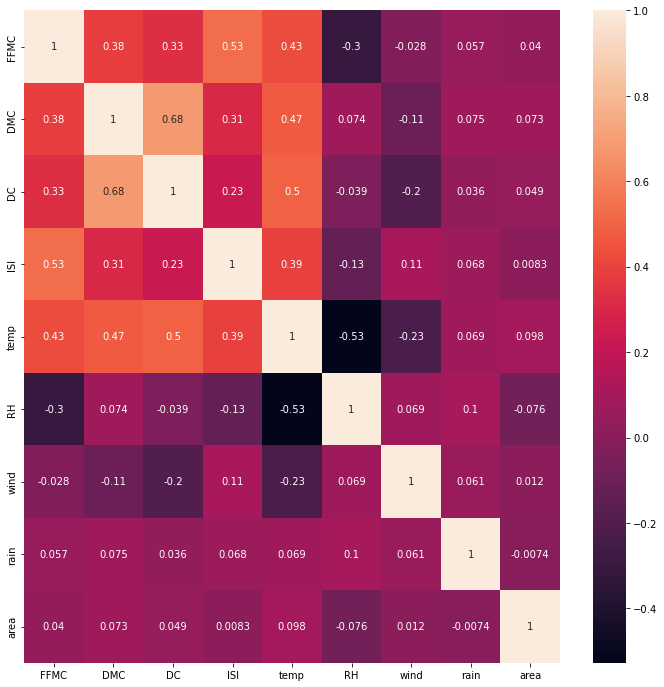

In [9]:
plt.figure(figsize=(12,12))
sns.heatmap(corel,annot=True)

#### No variable is highly correlated to each others.

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

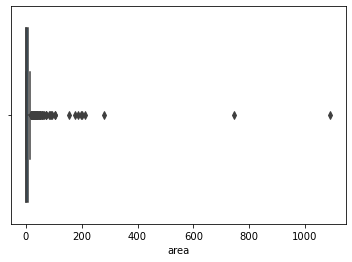

In [10]:
sns.boxplot(ff1['area'])

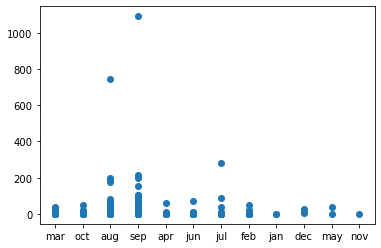

In [11]:
plt.scatter(x = ff1['month'],y=ff1['area'])

### Data has many outliers but 3 points are main are Extreme outliers.

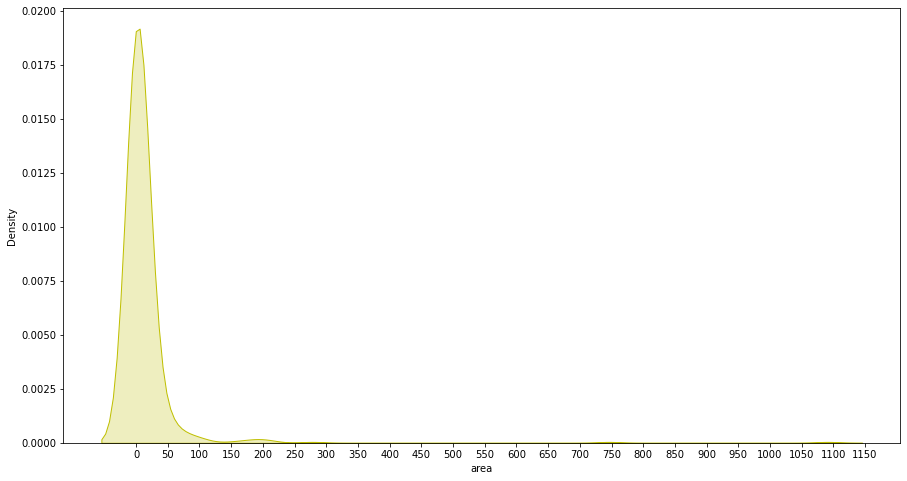

In [12]:
plt.figure(figsize=(15,8))
sns.kdeplot(ff1['area'],shade=True, color='y')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

### Most of the forest area seems to be between 0 to 100 acre.

In [13]:
obj = ff1.select_dtypes(include='object').columns.tolist()
obj.remove('size_category')
obj

['month', 'day']

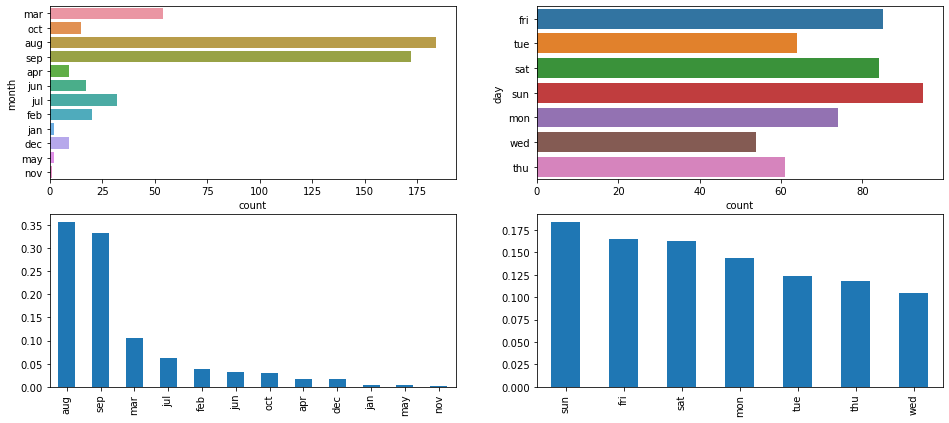

In [14]:
plt.figure(figsize=(16,7))
for i,col in enumerate(obj,1):
    plt.subplot(2,2,i)
    sns.countplot(data=ff1,y=col)
    plt.subplot(2,2,i+2)
    ff1[col].value_counts(normalize=True).plot.bar()

### Most no. of Fires occures in August & September
### Sunday seems to be the most time fire occured day.

In [15]:
a = ff1[ff1.columns[2:11]]
num = a.select_dtypes(exclude='object').columns.tolist()
num

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

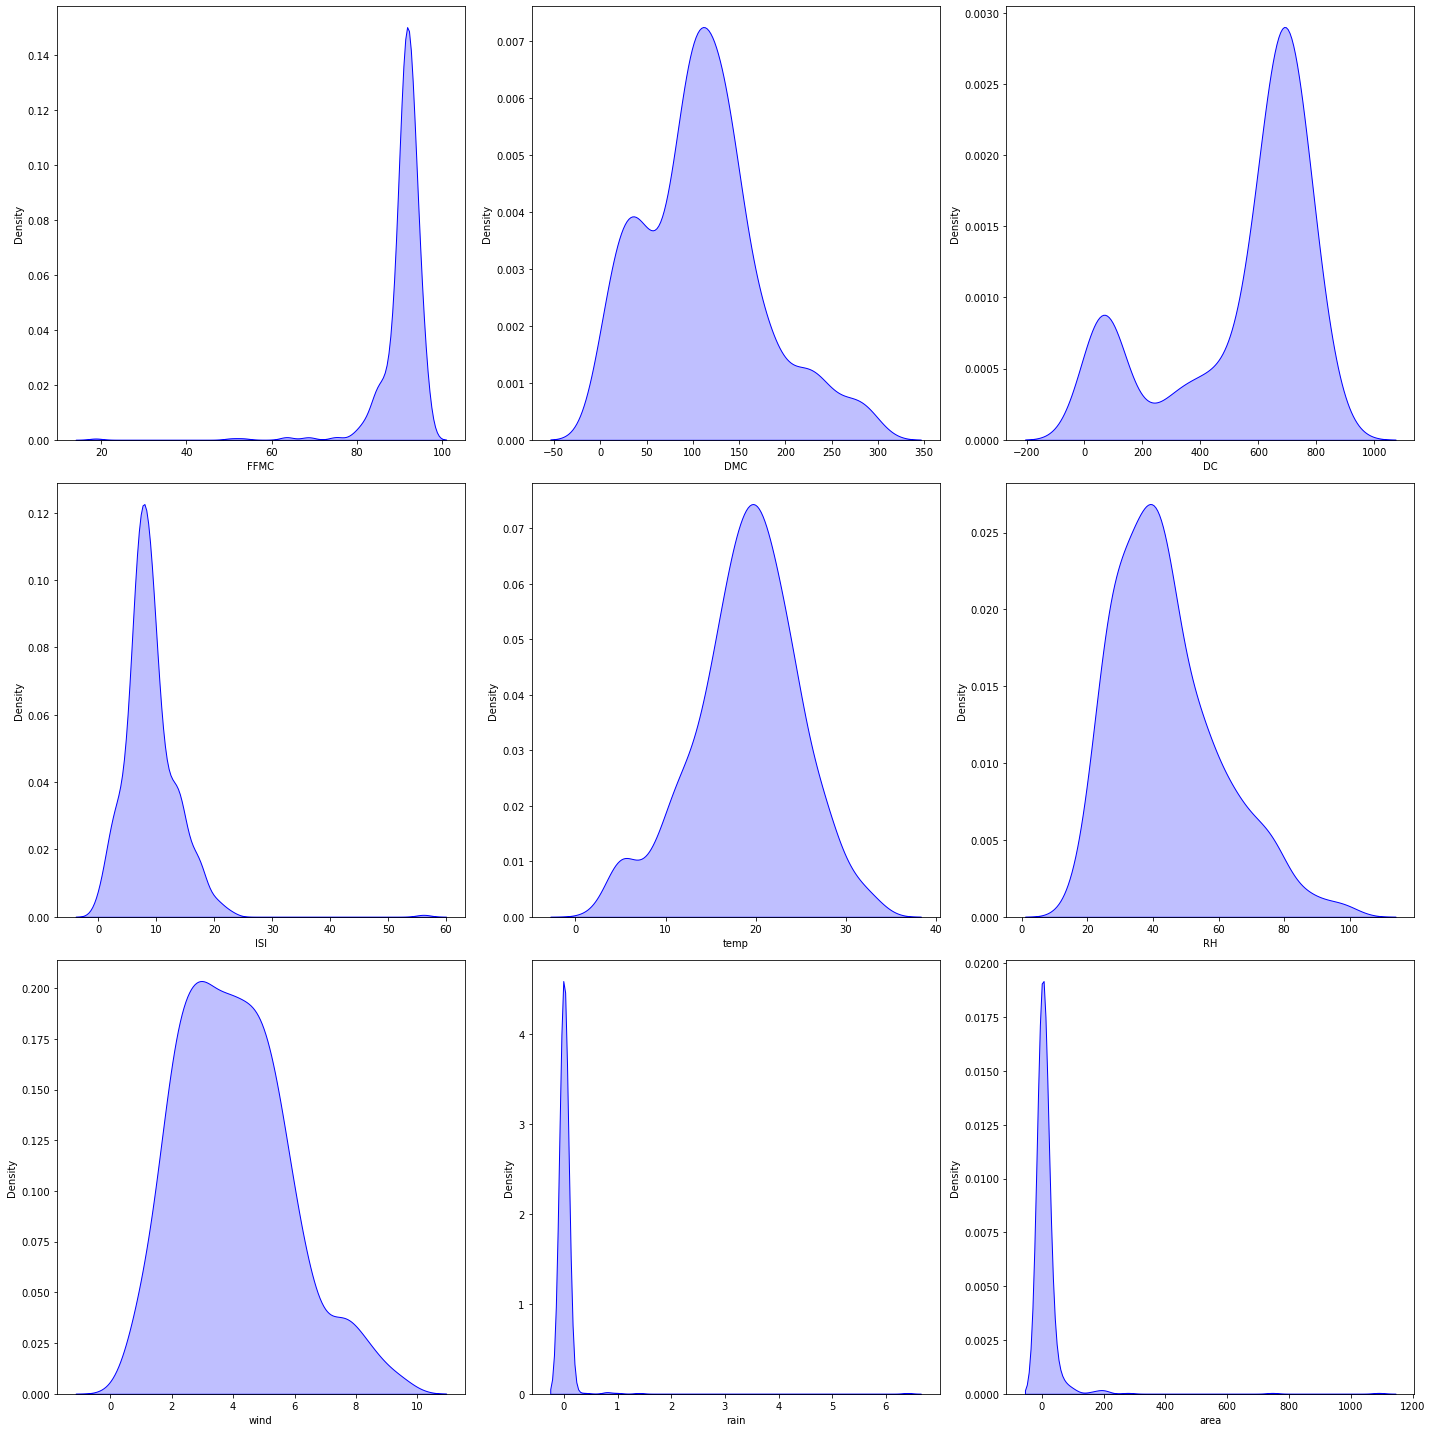

In [16]:
plt.figure(figsize=(20,20))
for i,col in enumerate(num,1):
    plt.subplot(3,3,i)
    sns.kdeplot(data=ff[col],shade=True,color='b')
plt.tight_layout()

## Model Building

In [17]:
x = ff1.iloc[:,2:30]
y = ff1.iloc[:,30]

In [18]:
y = y.replace({'small':1,'large':0})

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=250)

## SVM Linear Model

In [20]:
clf = SVC()
param_grid = [{'kernel':['linear'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['linear']}])

In [21]:
gsv.best_params_,gsv.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'linear'}, 0.9854819976771196)

C as 15 and Gamma as 50 gives best result for linear SVM Model.

In [22]:
model_linear = SVC(kernel='linear',C=15,gamma=50)
model_linear.fit(xtrain,ytrain)

SVC(C=15, gamma=50, kernel='linear')

In [23]:
yhat = model_linear.predict(xtest)
yhat

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [24]:
accuracy_score(ytest,yhat)

1.0

In [25]:
confusion_matrix(ytest,yhat)

array([[26,  0],
       [ 0, 78]], dtype=int64)

## SVM RBF Model

In [26]:
clf = SVC()
param_grid1 = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv1 = GridSearchCV(clf,param_grid1,cv=10)
gsv1.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [27]:
gsv1.best_params_, gsv1.best_score_

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7360627177700347)

C as 15 and Gamma as 0.5 gives best result for RBF SVM Model.

In [28]:
rbf_model = SVC(kernel='rbf',C=15,gamma=0.5)
rbf_model.fit(xtrain,ytrain)

SVC(C=15, gamma=0.5)

In [29]:
ypred = rbf_model.predict(xtest)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [30]:
accuracy_score(ytest,ypred)

0.75

In [31]:
confusion_matrix(ytest,ypred)

array([[ 0, 26],
       [ 0, 78]], dtype=int64)

## Polynomial SVM Model

In [32]:
clf = SVC()
param_grid2 = [{'kernel':['poly'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv2 = GridSearchCV(clf,param_grid2,cv=10)
gsv2.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['poly']}])

In [33]:
gsv2.best_params_,gsv2.best_score_

({'C': 15, 'gamma': 50, 'kernel': 'poly'}, 0.9709639953542393)

C as 15 and Gamma as 50 gives best result for Polynomial SVM Model.

In [34]:
poly_model = SVC(kernel='poly',C=15, gamma=50)
poly_model.fit(xtrain,ytrain)

SVC(C=15, gamma=50, kernel='poly')

In [35]:
ypd = poly_model.predict(xtest)
ypd

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [36]:
accuracy_score(ytest,ypd)

0.9711538461538461

In [37]:
confusion_matrix(ytest,ypd)

array([[26,  0],
       [ 3, 75]], dtype=int64)

## Output

### Linear Model gave us the best possible Accuracy ie. 100%
- Linear model was the best. 2nd best model was the Polynomial model.